In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
humanset1 = pd.read_json("set1_human.json")
humanset2 = pd.read_json("set2_human.json")
machineset1 = pd.read_json("set1_machine.json")
machineset1 = machineset1.drop("machine_id",axis=1)
machineset2 = pd.read_json("set2_machine.json")
machineset2 = machineset2.drop("machine_id",axis=1)
test = pd.read_json("test.json")
test["txt2"] = test["txt"].apply(lambda x:[str(each) for each in x])
test["txt2"] = test["txt2"].apply(lambda x:" ".join(x))
test["prompt"] = test["prompt"].apply(lambda x:[str(each) for each in x])
test["prompt"] = test["prompt"].apply(lambda x:" ".join(x))
X_pred = pd.concat([test['txt2'], test['prompt']], axis=1)

In [3]:
key = [1]*humanset1.shape[0]
humanset1["key"] = key
key = [1]*humanset2.shape[0]
humanset2["key"] = key
key = [0]*machineset1.shape[0]
machineset1["key"] = key
key = [0]*machineset2.shape[0]
machineset2["key"] = key
humanset = pd.concat([humanset1,humanset2], axis = 0)
machineset = pd.concat([machineset1,machineset2], axis = 0)
data = pd.concat([humanset, machineset], axis = 0)
data['prompt_str'] = data['prompt'].apply(lambda x: ' '.join(map(str, x)))
data['txt_str'] = data['txt'].apply(lambda x: ' '.join(map(str, x)))

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['txt_str'])
prompt =  vectorizer.transform(data['prompt_str'])
similarity = []
for i in range(data.shape[0]):
    similarity.append(cosine_similarity(X[i], prompt[i])[0][0])

<Axes: xlabel='similarity', ylabel='Count'>

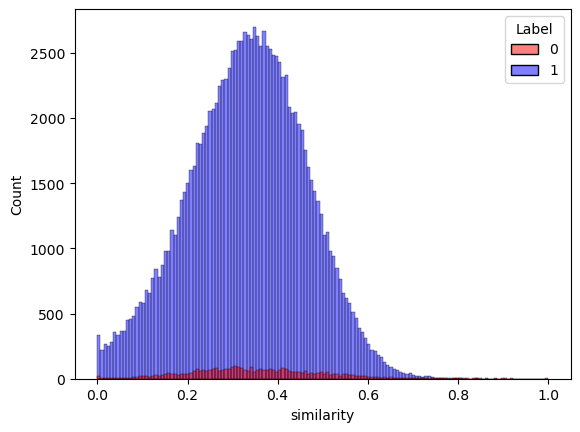

In [18]:
data['cosine_similarity'] = similarity

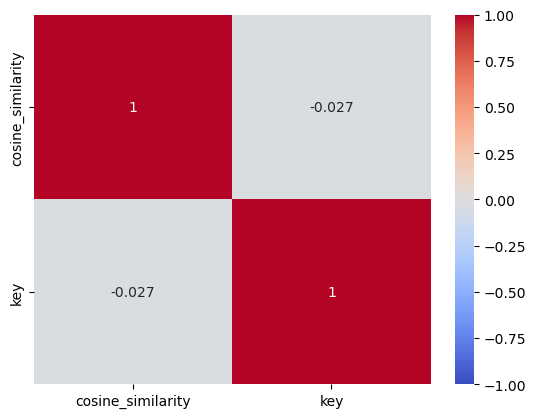

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[['cosine_similarity', 'key']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [44]:
import pandas as pd

df1 = pd.read_csv('0.73.csv', names=['id',1])
df1 = df1.drop(df1.index[0])
df2 = pd.read_csv('result5.csv', names=['id',2])
df2 = df2.drop(df2.index[0])
df3 = pd.read_csv('results9.csv', names=['id',3])
df3 = df3.drop(df3.index[0])

df_merged = pd.concat([df1[1], df2[2], df3[3]], axis=1)
aaaa = [df_merged[1].astype(int).tolist(),df_merged[2].astype(int).tolist(),df_merged[3].astype(int).tolist()]
data_transposed = list(map(list, zip(*aaaa)))
df = pd.DataFrame(data_transposed)
df

,0,1,2
0,1,1,1
1,0,0,1
2,1,0,1
3,1,1,1
4,0,1,1
...,...,...,...
995,0,0,0
996,0,0,0
997,0,0,0
998,0,0,0


In [45]:
a = list(range(1000))
result = []
for i in range(len(df)):
    row = df.iloc[i].tolist()
    arr = np.array(row)
    counts = np.bincount(arr)
    most_common_num = np.argmax(counts)
    result.append(most_common_num)
result_df = pd.DataFrame({
    'id' : a,
    'Predicted' : result,
})
result_df.to_csv('result8888.csv', index=False)

In [43]:
df_merged[1].astype(int)

1       1
2       0
3       1
4       1
5       0
       ..
996     0
997     0
998     0
999     0
1000    0
Name: 1, Length: 1000, dtype: int32